#Phase 1

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
import datetime as dt
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
%matplotlib inline

In [ ]:
item_name = "Clutch Case" #@param ["Horizon case", "Spectrum 2 Case", "Operation Hydra Case", "Spectrum Case", "Glove Case", "Gamma 2 Case", "Gamma Case", "Chroma 3 Case", "Operation Wildfire Case", "Revolver Case", "Shadow Case", "Falchion Case", "Chroma 2 Case", "Chroma Case", "Operation Vanguard Weapon Case", "Operation Breakout Weapon Case", "Huntsman Weapon Case", "Operation Phoenix Weapon Case", "Winter Offensive Weapon Case", "Prisma 2 Case", "Chicken Capsule", "Prisma Case", "Danger Zone Case", "Sticker Capsule 2", "Sticker Capsule", "Snakebite Case", "Operation Broken Fang Case", "Fracture Case", "Shattered Web Case", "Clutch Case", "R8 Revolver | Blaze", "AK-47 | Vulcan"] {allow-input: true}

In [ ]:
name='/content/drive/MyDrive/College_Project/Steam_scrapper/Database_of_items_price/'+item_name+'.csv'
item=pd.read_csv(name)

In [ ]:
item.tail(3)

,Date,Price,Quantity Sold
2222,May 01 2022 11: +0,0.305,5618
2223,May 01 2022 12: +0,0.301,4692
2224,May 01 2022 13: +0,0.300,5858


##Data Preprocessing

###Filtering date

In [ ]:
## function to filter only date from the string and return 
def filterdate(s):
  s=s.split()
  date_str=' '.join([s[0],s[1],s[2]])
  return datetime.strptime(date_str, '%b %d %Y').date()


In [ ]:
item['Date'] = item['Date'].apply(filterdate)
item.tail()

,Date,Price,Quantity Sold
2220,2022-05-01,0.310,3999
2221,2022-05-01,0.301,4065
2222,2022-05-01,0.305,5618
2223,2022-05-01,0.301,4692
2224,2022-05-01,0.300,5858


In [ ]:
print(item.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           2225 non-null   object 
 1   Price          2225 non-null   float64
 2   Quantity Sold  2225 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 52.3+ KB
None


###Storing mean of same dates

In [ ]:
group=item.groupby('Date')
mdf=group.mean()
mdf.tail()

,Price,Quantity Sold
Date,,
2022-04-27,0.289167,4532.541667
2022-04-28,0.297125,4556.500000
2022-04-29,0.299125,4429.125000
2022-04-30,0.302625,4930.625000
2022-05-01,0.304143,3854.928571


In [ ]:
item.describe()

,Price,Quantity Sold
count,2225.000000,2225.000000
mean,0.203090,52055.027865
std,0.320704,46450.092936
min,0.030000,1214.000000
25%,0.040000,5897.000000
50%,0.157000,39620.000000
75%,0.296000,88953.000000
max,8.940000,386712.000000


In [ ]:
bool_series = pd.isnull(item['Price'])
print(item[bool_series])
bool_series=pd.isnull(item['Quantity Sold'])
print(item[bool_series])
bool_series=pd.isnull(item['Date'])
print(item[bool_series])
#checking null values in the dataset, there is no null value

Empty DataFrame
Columns: [Date, Price, Quantity Sold]
Index: []
Empty DataFrame
Columns: [Date, Price, Quantity Sold]
Index: []
Empty DataFrame
Columns: [Date, Price, Quantity Sold]
Index: []


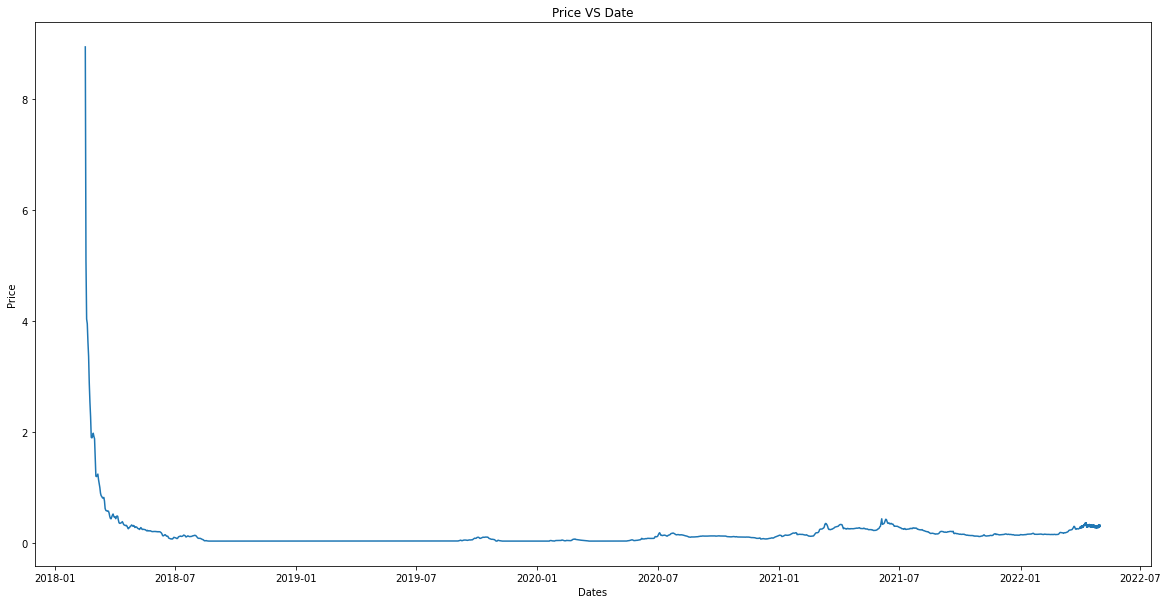

In [ ]:
plt.figure(figsize=(20,10))
plt.title('Price VS Date')
plt.xlabel('Dates')
plt.ylabel('Price')
plt.plot(item['Date'], item['Price'])
plt.show()

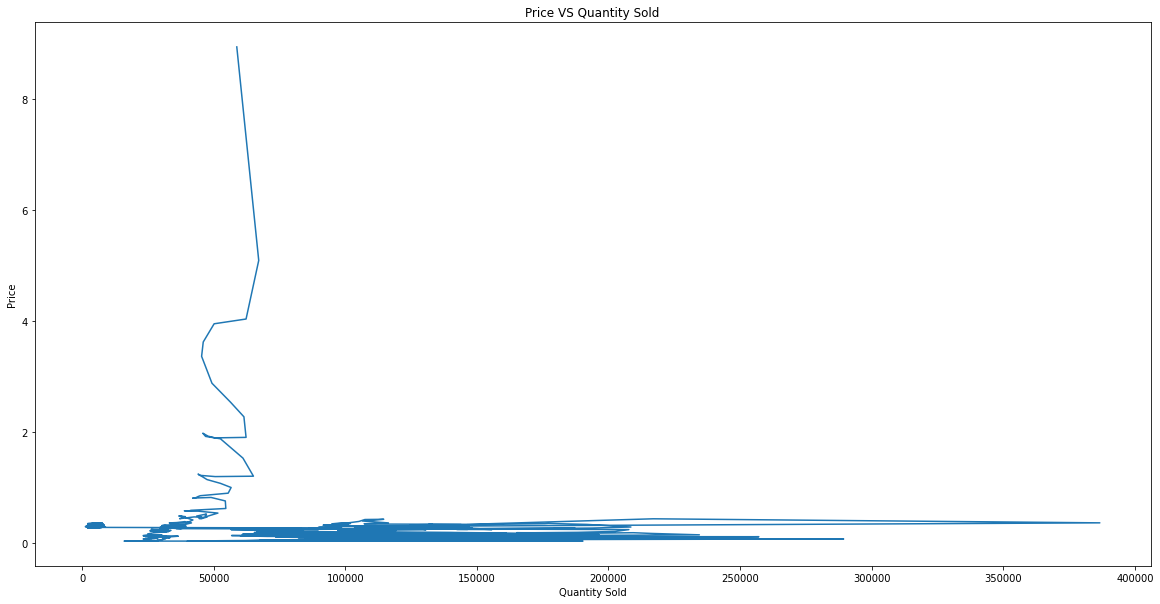

In [ ]:
plt.figure(figsize=(20,10))
plt.title('Price VS Quantity Sold')
plt.ylabel('Price')
plt.xlabel('Quantity Sold')
plt.plot(item['Quantity Sold'],item['Price'])
plt.show()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f8b7d95da50>,
      dtype=object)

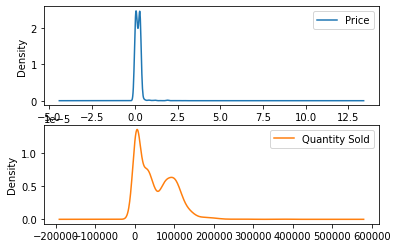

In [ ]:
#Density plots
item[['Price', 'Quantity Sold']].plot(kind='density', subplots=True, sharex=False)


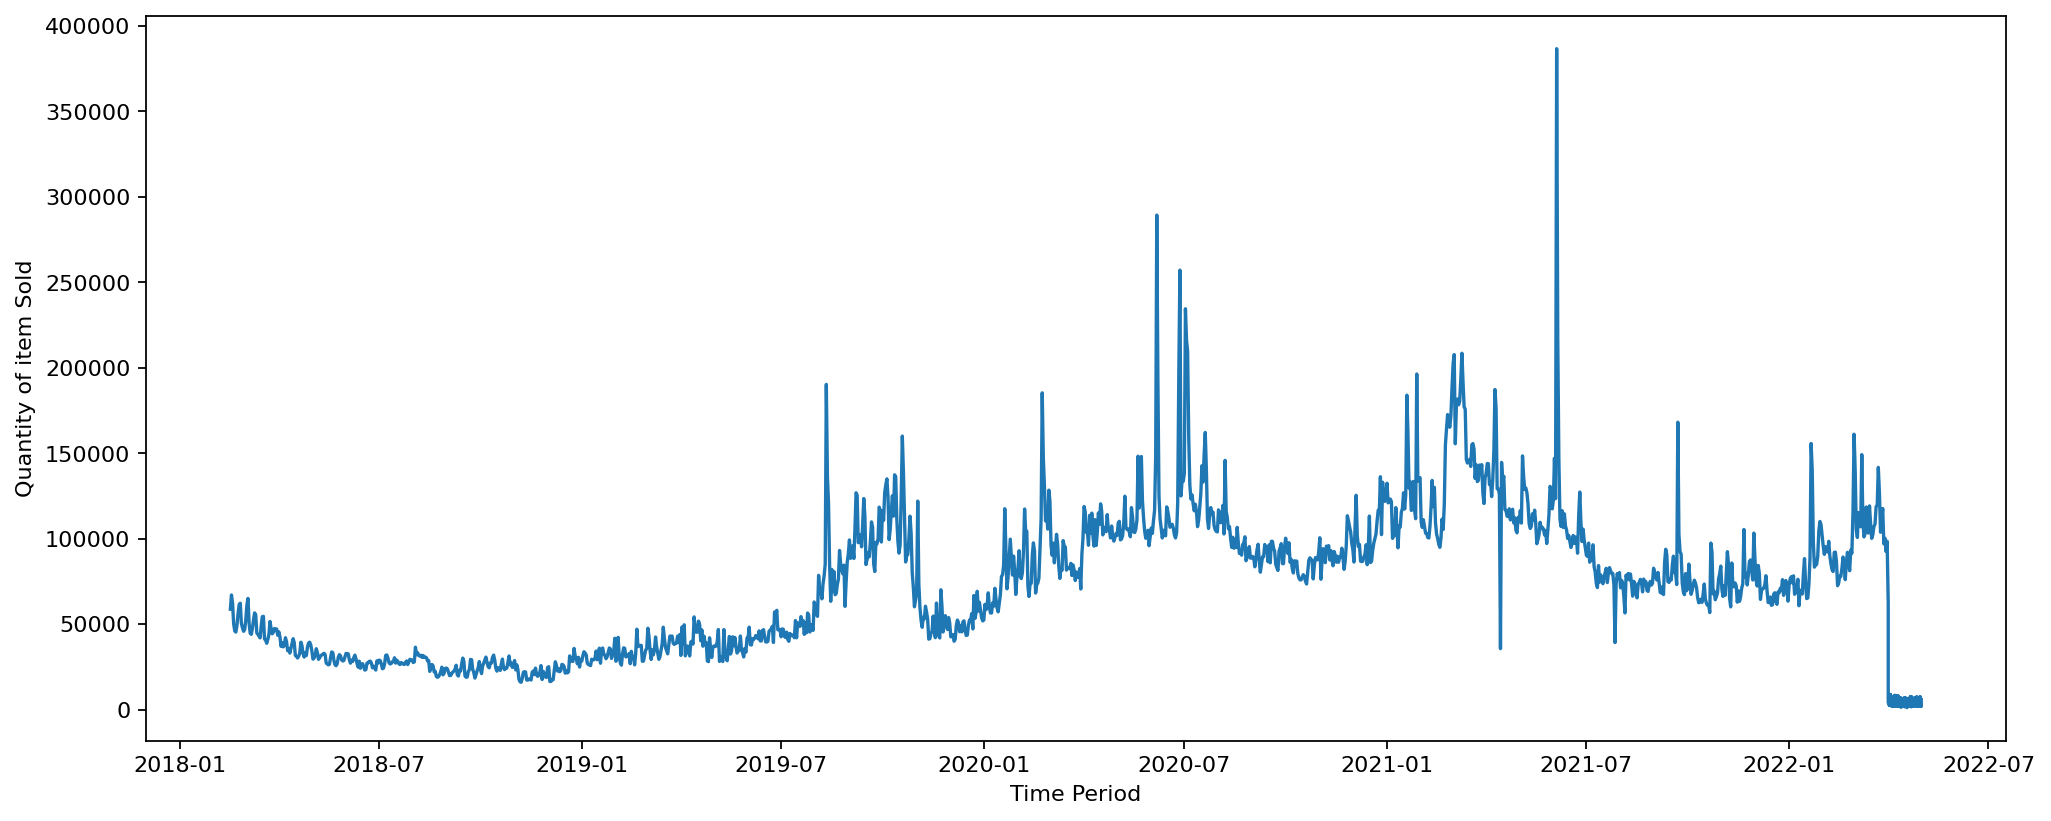

In [ ]:
plt.figure(figsize=(15,6), dpi=160)
plt.xlabel('Time Period')
plt.ylabel('Quantity of item Sold')
plt.plot(item['Date'], item['Quantity Sold'])
plt.show()

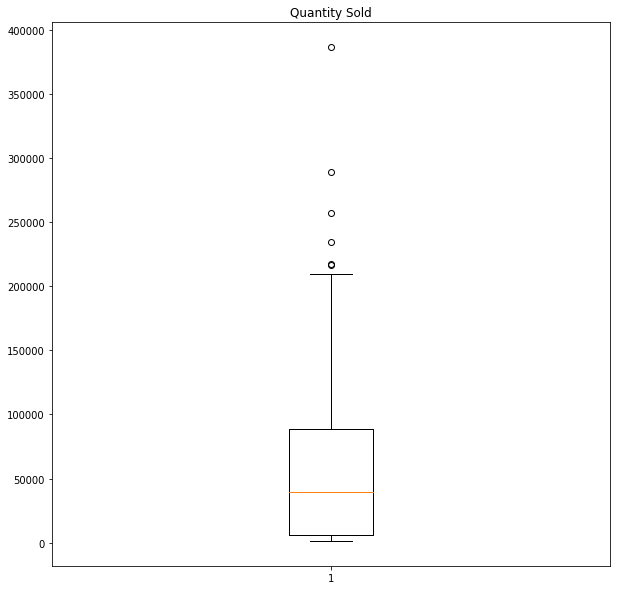

In [ ]:
#box whisker's plot
#item.plot(kind='box', subplots=True, sharex=False, sharey=False)
fig, ax = plt.subplots(figsize=(10, 10))
ax.boxplot(item['Quantity Sold'])
ax.set_title('Quantity Sold')
plt.show()
#ax.boxplot(item['Price'])
#plt.show()

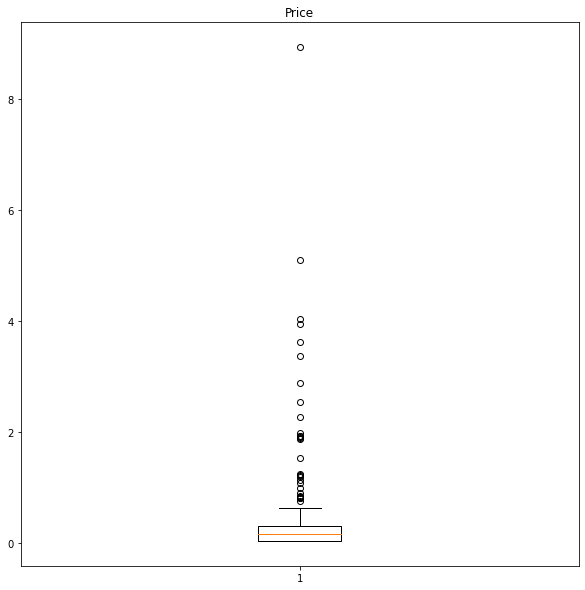

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title('Price')
ax.boxplot(item['Price'])
plt.show()

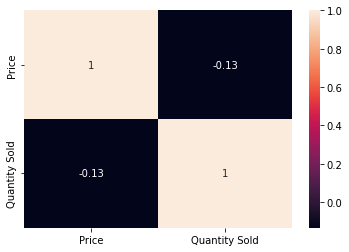

In [ ]:
#corr matrix
cm=item.corr()
sns.heatmap(cm, annot=True)

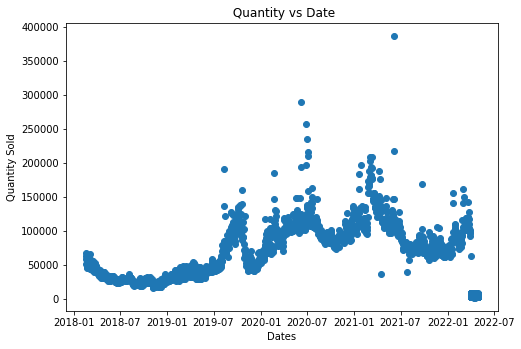

In [ ]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(item['Date'], item['Quantity Sold'])
ax.set_xlabel('Dates')
ax.set_ylabel('Quantity Sold')
ax.set_title(' Quantity vs Date')
plt.show()

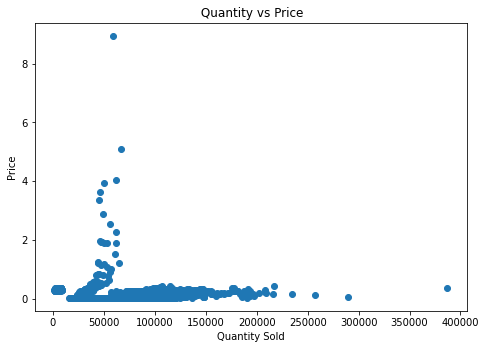

In [ ]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter( item['Quantity Sold'], item['Price'],)
ax.set_xlabel('Quantity Sold')
ax.set_ylabel('Price')
ax.set_title(' Quantity vs Price')
plt.show()

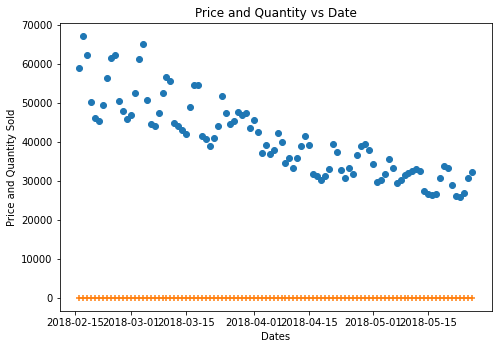

In [ ]:
#scatter plot
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(item['Date'][:100], item['Quantity Sold'][:100])
ax.scatter(item['Date'][:100], item['Price'][:100], marker='+')
ax.set_xlabel('Dates')
ax.set_ylabel('Price and Quantity Sold')
ax.set_title('Price and Quantity vs Date')
plt.show()

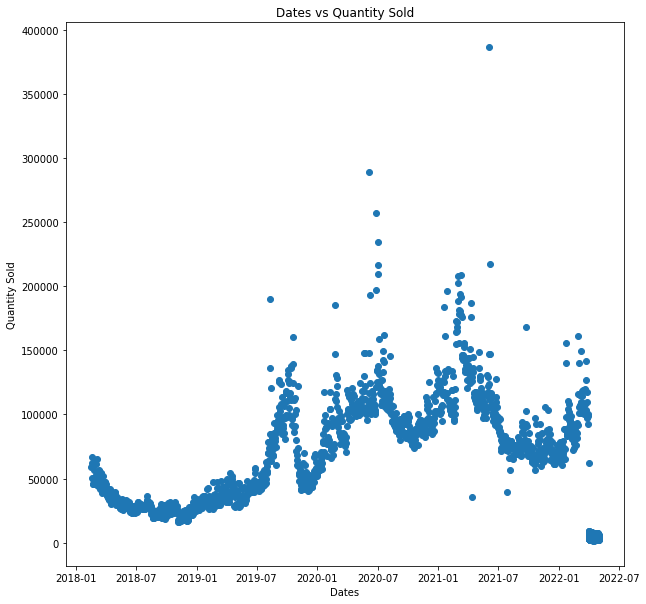

In [ ]:
plt.figure(figsize=(10,10))
plt.xlabel('Dates')
plt.ylabel('Quantity Sold')
plt.title('Dates vs Quantity Sold')
plt.scatter(item['Date'],item['Quantity Sold'])
plt.show()

## Converting Dates into numerical data

In [ ]:
item['Date'] = item['Date'].apply(lambda x :x.toordinal())
item.tail()

,Date,Price,Quantity Sold
2220,738276,0.310,3999
2221,738276,0.301,4065
2222,738276,0.305,5618
2223,738276,0.301,4692
2224,738276,0.300,5858


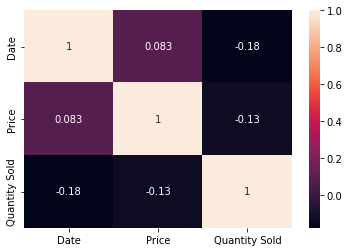

In [ ]:
#corr matrix
cm=item.corr()
sns.heatmap(cm, annot=True)

##Fitting according to the dates and the prices
###Splitting of dataset

In [ ]:
item.head()

,Date,Price,Quantity Sold
0,736741,8.940,58774
1,736742,5.090,67111
2,736743,4.034,62299
3,736744,3.948,50165
4,736745,3.620,46028


#Models

##Model 1 using price and date as y and x 

In [ ]:
reg1=linear_model.LinearRegression()
reg1.fit(X_train, np.array(y_train).reshape(-1,1))

LinearRegression()

In [ ]:
reg1.predict([[datetime.strptime("2022-01-01", "%Y-%m-%d").toordinal()]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


ValueError: ignored

In [ ]:
reg1.coef_

array([[ 1.98956639e-05, -8.72388719e-07]])

In [ ]:
reg1.intercept_

array([-14.42432123])

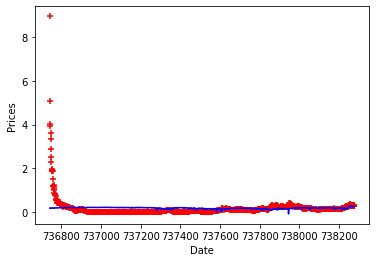

In [ ]:
plt.xlabel('Date')
plt.ylabel('Prices')
plt.scatter(item.Date, item.Price, color='red', marker='+')
plt.plot(item.Date, reg1.predict(X), color='blue')

###Accuracy

In [ ]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score
def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')

In [ ]:
test_pred = reg1.predict(np.array(X_test['Date']).reshape(-1,1))
train_pred = reg1.predict(np.array(X_train['Date']).reshape(-1,1))

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


ValueError: ignored

##Finding opti parameters function for further models

In [ ]:
def findOptiPara(trainX, trainY, testX, testY):
  for i in range(1,10):
    poly = PolynomialFeatures(degree=i, include_bias=True)
    x_train_trans = poly.fit_transform(trainX)
    x_test_trans = poly.transform(testX)
    lr = LinearRegression()
    lr.fit(x_train_trans, trainY)
    y_pred = lr.predict(x_test_trans)
    print("degree="+ str(i) +" r2 score="+str(metrics.r2_score(y_test, y_pred)))
    ##Plot graph
    #x = poly.transform(X)
    #lr = LinearRegression()
    #lr.fit(x, y)
    #z=lr.predict(x)
    #plt.figure(i)
    #plt.xlabel('Date')
    #plt.ylabel('Prices')
    #plt.scatter(item.Date, item.Price, color='red', marker='+') 
    #plt.plot(item.Date, z, color='blue')



##Model 2 using quantity sold(x) and price(y)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X[['Quantity Sold']], y, test_size=0.2, random_state=2)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
#applying polynomial regression degree 2
poly = PolynomialFeatures(degree=1, include_bias=True)
x_train_trans = poly.fit_transform(x_train)
x_test_trans = poly.transform(x_test)
#include bias parameter
lr = LinearRegression()
lr.fit(x_train_trans, y_train)
y_pred = lr.predict(x_test_trans)

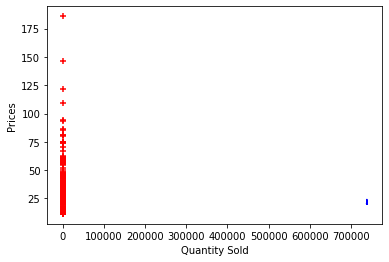

In [ ]:
x_test_trans = poly.transform(X[['Quantity Sold']])
z=lr.predict(x_test_trans)
plt.xlabel('Quantity Sold')
plt.ylabel('Prices')
plt.scatter(item['Quantity Sold'], item.Price, color='red', marker='+')
plt.plot(item.Date, z, color='blue')

In [ ]:
findOptiPara(x_train, y_train, x_test, y_test)

degree=1 r2 score=-0.009214564886363519
degree=2 r2 score=-8.276586972413636
degree=3 r2 score=-130.84548175985535
degree=4 r2 score=-2354.73462202407
degree=5 r2 score=-12221.295499433716
degree=6 r2 score=-73243.70198591545
degree=7 r2 score=-47817046.94752096
degree=8 r2 score=-567032827.2296199
degree=9 r2 score=-5276157358.23851


hence we cannot select quantity sold as a feature to determine the price as best accuracy is only 38% approx.

##Model 3 Using polynomial regression using one variable (date)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X[['Date']], y, test_size=0.3, random_state=2)

In [ ]:
#applying polynomial regression degree 2
poly = PolynomialFeatures(degree=2, include_bias=True)
x_train_trans = poly.fit_transform(x_train)
x_test_trans = poly.transform(x_test)
#include bias parameter
lr = LinearRegression()
lr.fit(x_train_trans, y_train)
y_pred = lr.predict(x_test_trans)

In [ ]:
x_test_trans = poly.transform(X[['Date']])
z=lr.predict(x_test_trans)

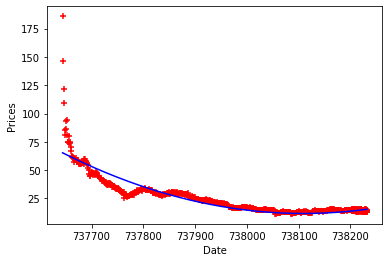

In [ ]:
plt.xlabel('Date')
plt.ylabel('Prices')
plt.scatter(item.Date, item.Price, color='red', marker='+')
plt.plot(item.Date, z, color='blue')

##Finding optimal degree for regression

In [ ]:
findOptiPara(x_train, y_train, x_test, y_test)

degree=1 r2 score=0.5476441240152168
degree=2 r2 score=0.737115129662496
degree=3 r2 score=0.7370937676648852
degree=4 r2 score=0.7370723947255113
degree=5 r2 score=0.7370510174184008
degree=6 r2 score=0.737029635505775
degree=7 r2 score=0.737008249657741
degree=8 r2 score=0.7369868593179263
degree=9 r2 score=0.7369654644376704


#### Accuracy is almost constant for degree>=2. Hence we need take 2 here.

###Accuracy of selected model

In [ ]:
x_test_trans=poly.fit_transform(x_test)
x_train_trans=poly.fit_transform(x_train)
test_pred = lr.predict(x_test_trans)
train_pred = lr.predict(x_train_trans)
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 2.2388101142264705
MSE: 50.98496560265822
RMSE: 7.1403757325968655
R2 Square 0.737115129662496
__________________________________
Train set evaluation:
_____________________________________
MAE: 2.178867235097144
MSE: 26.518764084512707
RMSE: 5.149637276984924
R2 Square 0.8559324393982004
__________________________________


## function to predict the price of the item from our model

In [ ]:
#@title Default title text
Enter_date = "2021-11-21" #@param {type:"date"}
date=list(map(int, Enter_date.split('-')))
date=dt.date(year=date[0], month=date[1], day=date[2])
date=date.toordinal()

###predicting on model 1 linear regression using only date and price as x and y attributes

In [ ]:
def prediction1(date):
  return reg1.predict([[date]])
print(prediction1(date))

[[18.39912369]]


###predicting on model 2 polynomial regression model 

In [ ]:
def prediction2(date):
  return lr.predict(poly.transform([[date]]))
print(prediction2(date))

[11.75875023]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


#Phase 2

In [ ]:
X=item[['Date', 'Quantity Sold', 'exterior', 'rarity']]
y=item['Price']
sc = StandardScaler()
X = sc.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X[:5,:]

array([[-2.4075811 , -0.29806943,  0.        ,  0.        ],
       [-2.4021113 , -0.34253711,  0.        ,  0.        ],
       [-2.3966415 , -0.47594016,  0.        ,  0.        ],
       [-2.3911717 , -0.33512583,  0.        ,  0.        ],
       [-2.38570191, -0.34253711,  0.        ,  0.        ]])

In [ ]:
y.head()

0    185.958
1    146.261
2    121.733
3    108.906
4     85.276
Name: Price, dtype: float64

###Linear Regression

In [ ]:
reg2=linear_model.LinearRegression()
reg2.fit(X_train, y_train)

LinearRegression()

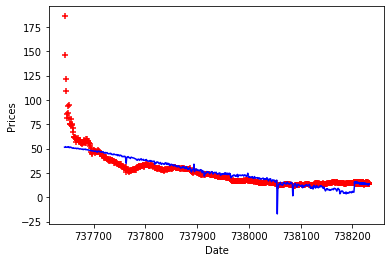

In [ ]:
plt.xlabel('Date')
plt.ylabel('Prices')
plt.scatter(item.Date, item.Price, color='red', marker='+')
plt.plot(item.Date, reg2.predict(X), color='blue')

In [ ]:
test_pred = reg2.predict(X_test)
train_pred = reg2.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 2.8047789767815616
MSE: 46.00742446953934
RMSE: 6.782877300197855
R2 Square 0.7528950739058908
__________________________________
Train set evaluation:
_____________________________________
MAE: 3.120605895194528
MSE: 57.09589579216366
RMSE: 7.556182620355576
R2 Square 0.695426999822703
__________________________________


##Polynomial Regression Model

In [ ]:
findOptiPara(X_train, y_train, X_test, y_test)

degree=1 r2 score=0.7528950739058907
degree=2 r2 score=0.8536390456277045
degree=3 r2 score=0.9044696133794897
degree=4 r2 score=0.9358569167792654
degree=5 r2 score=0.9529516246578995
degree=6 r2 score=0.9512997256441356
degree=7 r2 score=0.5449172070706558
degree=8 r2 score=0.6559006125573082
degree=9 r2 score=-0.8253999026416994


In [ ]:
#applying polynomial regression degree 2
poly = PolynomialFeatures(degree=3, include_bias=True)
x_train_trans = poly.fit_transform(X_train)
x_test_trans = poly.transform(X_test)
#include bias parameter
lr1 = LinearRegression()
lr1.fit(x_train_trans, y_train)
y_pred = lr1.predict(x_test_trans)

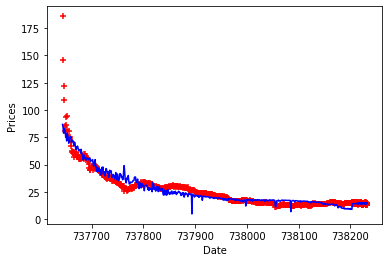

In [ ]:
plt.xlabel('Date')
plt.ylabel('Prices')
plt.scatter(item.Date, item.Price, color='red', marker='+')
x_trans=poly.fit_transform(X)
z=lr1.predict(x_trans)
plt.plot(item.Date, z, color='blue')

In [ ]:
test_pred=lr1.predict(x_test_trans)
train_pred=lr1.predict(x_train_trans)
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 1.9649661128820504
MSE: 17.78639995754335
RMSE: 4.217392554356702
R2 Square 0.9044696133794897
__________________________________
Train set evaluation:
_____________________________________
MAE: 2.1889411381467343
MSE: 25.552876670685094
RMSE: 5.054985328434208
R2 Square 0.8636904421452446
__________________________________


##Decision Tree regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import explained_variance_score
from sklearn.metrics import confusion_matrix

In [ ]:
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
y_pred=regressor.predict(X_test)

In [ ]:
print("----------On training dataset----------------")
print_evaluate(y_train,regressor.predict(X_train))
print("-------------On testing dataset--------------")
print_evaluate( y_test, y_pred)

----------On training dataset----------------
MAE: 0.06488379737045631
MSE: 0.028124939675174015
RMSE: 0.1677049184585056
R2 Square 0.9998499699998078
__________________________________
-------------On testing dataset--------------
MAE: 0.6916322072072072
MSE: 3.2117375683370875
RMSE: 1.7921321291514996
R2 Square 0.9827498238902058
__________________________________


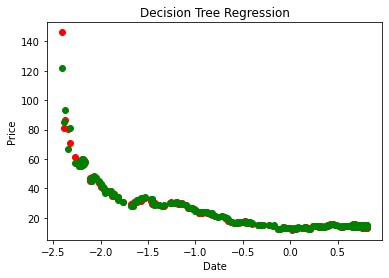

In [ ]:
X_grid = np.arange(min(X_test[:,0]), max(X_test[:,0]))
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X_test[:,0], y_test, color = 'red')
plt.scatter(X_test[:,0], y_pred, color = 'green')
plt.title('Decision Tree Regression')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [ ]:
decision_score=regressor.score(X_test,y_test)
expl_tr = explained_variance_score(regressor.predict(X_test),y_test)
print(decision_score, expl_tr)

0.9827498238902058 0.9815227322874356


##Implementing Random Forrest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
rf.fit(X_train, y_train)
y_pred=rf.predict(X_test)

In [ ]:
print("----------On training dataset----------------")
print_evaluate(y_train,rf.predict(X_train))
print("-------------On testing dataset--------------")
print_evaluate( y_test, rf.predict(X_test))

----------On training dataset----------------
MAE: 0.2517006498407176
MSE: 1.1449598018898237
RMSE: 1.070027944443426
R2 Square 0.9938923133247023
__________________________________
-------------On testing dataset--------------
MAE: 0.49864111646289033
MSE: 0.8338884177222212
RMSE: 0.9131749108041796
R2 Square 0.9955212025405071
__________________________________


In [ ]:
##feature ranking
feature_list=list(['Date', 'Qunatity Sold', 'Exterior', 'Rarity'])
feature_imp=pd.Series(rf.feature_importances_, index=feature_list).sort_values()
print(feature_imp)

Exterior         0.000000
Rarity           0.000000
Qunatity Sold    0.012315
Date             0.987685
dtype: float64


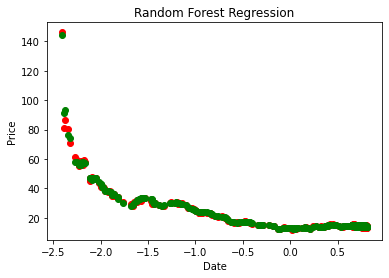

In [ ]:
plt.scatter(X_test[:,0], y_test, color = 'red')
plt.scatter(X_test[:,0], y_pred, color = 'green')
plt.title('Random Forest Regression')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

##Implementing SVM

In [ ]:
from sklearn import svm
svmModel=svm.SVR()
svmModel.fit(X_train, y_train)
y_pred=svmModel.predict(X_test)

In [ ]:
print("----------On training dataset----------------")
print_evaluate(y_train, svmModel.predict(X_train))
print("-------------On testing dataset--------------")
print_evaluate( y_test, y_pred)

----------On training dataset----------------
MAE: 1.8895058028528184
MSE: 54.08461389393504
RMSE: 7.354224221081041
R2 Square 0.7114904164553387
__________________________________
-------------On testing dataset--------------
MAE: 1.701096668159656
MSE: 44.7543143436525
RMSE: 6.689866541542702
R2 Square 0.7596255024968253
__________________________________


##Implementing XGBOOST Regressor

In [ ]:
from xgboost import XGBRegressor

In [ ]:
xg_reg = XGBRegressor()

In [ ]:
xg_reg.fit(X_train, y_train)

[10:01:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [ ]:
y_pred=xg_reg.predict(X_test)

In [ ]:
print("---------On training Dataset---------")
print_evaluate(y_train, xg_reg.predict(X_train))
print("--------On testing Dataset-----------")
print_evaluate(y_test, xg_reg.predict(X_test))

---------On training Dataset---------
MAE: 0.3831217365574671
MSE: 0.27260038180240903
RMSE: 0.5221114649214371
R2 Square 0.998545837402442
__________________________________
--------On testing Dataset-----------
MAE: 0.557223243507179
MSE: 2.384217409774412
RMSE: 1.544091127419108
R2 Square 0.9871944175613512
__________________________________


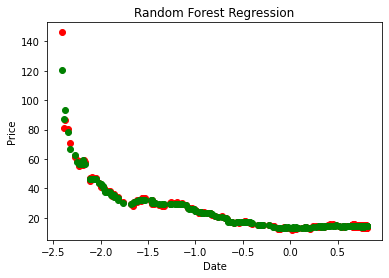

In [ ]:
plt.scatter(X_test[:,0], y_test, color = 'red')
plt.scatter(X_test[:,0], y_pred, color = 'green')
plt.title('Random Forest Regression')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

##Implementing more models

In [ ]:
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import Lasso

models = {
    'Linear Regression':LinearRegression(),
    'Lasso Regression':Lasso(),
    'Ridge':Ridge(),
    'ElasticNet':ElasticNet(),
    'SGDRegressor':SGDRegressor(),
    'BayesianRidge':BayesianRidge(),
}

In [ ]:
model_results = []
model_names = []

# training the model with function
for name,model in models.items():
    a = model.fit(X_train,y_train)
    print('------'+name+' on Testing Dataset----------')
    predicted = a.predict(X_test)
    print_evaluate(y_test, predicted)
    # score = np.sqrt(metrics.mean_squared_error(y_test, predicted))
    # model_results.append(score)
    # model_names.append(name)
    
    # #creating dataframe
    # df_results = pd.DataFrame([model_names,model_results])
    # df_results = df_results.transpose()
    # df_results = df_results.rename(columns={0:'Model',1:'RMSE'}).sort_values(by='RMSE',ascending=False)
    
# print(df_results)

------Linear Regression on Testing Dataset----------
MAE: 2.8047789767815616
MSE: 46.00742446953934
RMSE: 6.782877300197855
R2 Square 0.7528950739058908
__________________________________
------Lasso Regression on Testing Dataset----------
MAE: 2.6910799367316165
MSE: 49.70363920396738
RMSE: 7.050080794144659
R2 Square 0.7330427809486202
__________________________________
------Ridge on Testing Dataset----------
MAE: 2.800390742181901
MSE: 46.012652015928666
RMSE: 6.78326263798835
R2 Square 0.7528669968622597
__________________________________
------ElasticNet on Testing Dataset----------
MAE: 3.5119609107511383
MSE: 73.10015809869383
RMSE: 8.549863045610369
R2 Square 0.6073805614481879
__________________________________
------SGDRegressor on Testing Dataset----------
MAE: 2.8139258227280113
MSE: 46.03103880019665
RMSE: 6.78461780796801
R2 Square 0.7527682418239146
__________________________________
------BayesianRidge on Testing Dataset----------
MAE: 2.8018666318682772
MSE: 46.010816

##Implementing Neural Network

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from keras.callbacks import ReduceLROnPlateau

In [ ]:
nn_model = Sequential()
nn_model.add(Dense(3, kernel_initializer='normal', input_dim = X_train.shape[1] ,activation='relu'))
nn_model.add(Dense(1, kernel_initializer='normal', activation='linear'))

In [ ]:
loss_fn=keras.losses.MeanSquaredError()
nn_model.compile(loss=loss_fn, optimizer='sgd', metrics=[keras.metrics.MeanSquaredError()])
nn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 15        
                                                                 
 dense_1 (Dense)             (None, 1)                 4         
                                                                 
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________


In [ ]:
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
earlyStop = keras.callbacks.EarlyStopping(monitor='loss', patience=10)
rlrop = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=100)
def scheduler(epoch, lr):
     if epoch < 50:
      return lr
     else:
       return lr * tf.math.exp(-0.1)
learningR = keras.callbacks.LearningRateScheduler(scheduler)
callbacks_list = [checkpoint, earlyStop, learningR]

In [ ]:
nn_model.fit(X_train, y_train, epochs=1000, batch_size=150, validation_split = 0.2, callbacks=caallbacks_list)

Epoch 1/1000
1/5 [=====>........................] - ETA: 3s - loss: 719.8614 - mean_squared_error: 719.8614
Epoch 1: val_loss improved from inf to 547.46326, saving model to Weights-001--547.46326.hdf5
5/5 [==============================] - 1s 117ms/step - loss: 553.5022 - mean_squared_error: 553.5022 - val_loss: 547.4633 - val_mean_squared_error: 547.4633 - lr: 0.0100
Epoch 2/1000
1/5 [=====>........................] - ETA: 0s - loss: 622.9846 - mean_squared_error: 622.9846
Epoch 2: val_loss improved from 547.46326 to 462.12357, saving model to Weights-002--462.12357.hdf5
5/5 [==============================] - 0s 35ms/step - loss: 480.5341 - mean_squared_error: 480.5341 - val_loss: 462.1236 - val_mean_squared_error: 462.1236 - lr: 0.0100
Epoch 3/1000
1/5 [=====>........................] - ETA: 0s - loss: 283.6645 - mean_squared_error: 283.6645
Epoch 3: val_loss improved from 462.12357 to 176.64203, saving model to Weights-003--176.64203.hdf5
5/5 [==============================] - 0s 2

In [ ]:
print("---------On training Dataset---------")
print_evaluate(y_train, nn_model.predict(X_train))
print("--------On testing Dataset-----------")
print_evaluate(y_test, nn_model.predict(X_test))

---------On training Dataset---------
MAE: 2.1789458596922127
MSE: 43.75497120398951
RMSE: 6.61475405468635
R2 Square 0.7665929806797185
__________________________________
--------On testing Dataset-----------
MAE: 2.0883139692564265
MSE: 35.700010722471
RMSE: 5.974948595801557
R2 Square 0.8082559801412976
__________________________________
